In [1]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import matplotlib.pyplot as plot

In [3]:
import numpy as np
from numpy import *
import math
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
Industry_data = pd.read_csv("Mahi.csv")
Industry_data

,Height(inches),Weight(Pounds),Age,Grip Strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y
5,68.7,123,50,26,N
6,69.8,141,51,222,Y
7,70.1,136,23,20,Y
8,67.9,112,17,19,N
9,66.8,120,39,31,N


In [7]:
Industry_data.head()

,Height(inches),Weight(Pounds),Age,Grip Strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y


In [8]:
print(Industry_data.shape)

(10, 5)


In [9]:
Industry_data.columns

Index(['Height(inches)', 'Weight(Pounds)', 'Age', 'Grip Strength', 'Frailty'], dtype='object')

### First step in Data Cleaning- updating the column names so that the data in those features are accessible.

In [10]:
# Here we are trying to rename the Height(inches) column name as the braces can't be read. We are renaming it to Height_inches
# Also, we are renaming the column name Grip Strength to Grip_Strength

Industry_data = Industry_data.rename(columns = {'Height(inches)' : 'Height_inches','Weight(Pounds)':'Weight_Pounds','Grip Strength':'Grip_Strength'})

In [11]:
df = Industry_data.head(10000)
df

,Height_inches,Weight_Pounds,Age,Grip_Strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y
5,68.7,123,50,26,N
6,69.8,141,51,222,Y
7,70.1,136,23,20,Y
8,67.9,112,17,19,N
9,66.8,120,39,31,N


In [12]:
Industry_data.tail()

,Height_inches,Weight_Pounds,Age,Grip_Strength,Frailty
5,68.7,123,50,26,N
6,69.8,141,51,222,Y
7,70.1,136,23,20,Y
8,67.9,112,17,19,N
9,66.8,120,39,31,N


In [13]:
print(Industry_data.columns)

Index(['Height_inches', 'Weight_Pounds', 'Age', 'Grip_Strength', 'Frailty'], dtype='object')


In [14]:
print(Industry_data.columns[0:3])
# selecting the few variabes from the whole variables

Index(['Height_inches', 'Weight_Pounds', 'Age'], dtype='object')


In [15]:
print(Industry_data.dtypes)
# Data types of all the columns

Height_inches    float64
Weight_Pounds      int64
Age                int64
Grip_Strength      int64
Frailty           object
dtype: object


In [16]:
print(Industry_data['Age'].dtypes)
# to get the datatype of a respective(particular) column

int64


In [17]:
print(Industry_data.shape)
# It will gives the count of all the instances present in the dataset

(10, 5)


In [18]:
print('Number of rows:',Industry_data.shape[0])
print('Number of columns:',Industry_data.shape[1])


Number of rows: 10
Number of columns: 5


In [19]:
print(Industry_data.head(2)) 
# getting the first 2 rows

   Height_inches  Weight_Pounds  Age  Grip_Strength Frailty
0           65.8            112   30             30       N
1           71.5            136   19             31       N


In [20]:
print(Industry_data.Age.unique())
# prints the unique values from the section column

[30 19 45 22 29 50 51 23 17 39]


In [21]:
print(Industry_data.Frailty.unique()) 

['N' 'Y']


In [22]:
print(Industry_data.Grip_Strength.unique())

[ 30  31  29  28  24  26 222  20  19]


In [23]:
print(Industry_data.Height_inches.unique())

[65.8 71.5 69.4 68.2 67.8 68.7 69.8 70.1 67.9 66.8]


In [24]:
print(Industry_data.Weight_Pounds.unique())

[112 136 153 142 144 123 141 120]


## These below three blocks of code is completely dedicated to fetch the Missing values

In [25]:
# It will take out all the feature names which had null values
# The second line of the code will print the respective feature and the % of the missing values in that respective feature.

features_with_na=[features for features in Industry_data.columns if Industry_data[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature, np.round(Industry_data[feature].isnull().mean(),4), '%missing value')

In [26]:
for feature in features_with_na:
    data_Industry=Industry_data.copy()
    data_Industry[feature]=np.where(data[feature].isnull(),1,0)
    data_Industry.groupby(feature)['Weight_Pounds'].meadian().plot.bar()
    plt.title(feature)
    plt.show()
    

In [27]:
# Here if there is a relation between the missing values and the dependent variables. 
# we need to replace these nan values with something meaningful(Mean/Median/Mode/ some meaningful value) which will be done.
# In our scenario there are no missing values so no output. so, no need to worry about this.

## By this we can conclude that there are no Null Values present in the Dataset

In [28]:
# It will prints the count of Null values in the dataset. So, here there are No Null Values
print(Industry_data.isnull().sum())

Height_inches    0
Weight_Pounds    0
Age              0
Grip_Strength    0
Frailty          0
dtype: int64


# Exploratory Data Analysis (EDA) of the steel industry Dataset

In [29]:
pd.pandas.set_option('display.max_columns',None)

# Numerical Features

In [30]:
# It will take out all the features with Numerical Data.
numerical_features= [feature for feature in Industry_data.columns if Industry_data[feature].dtype != 'O']
print('Number of numerical features: ', len(numerical_features))
Industry_data[numerical_features].head()

Number of numerical features:  4


,Height_inches,Weight_Pounds,Age,Grip_Strength
0,65.8,112,30,30
1,71.5,136,19,31
2,69.4,153,45,29
3,68.2,142,22,28
4,67.8,144,29,24


In [31]:
# Numerical Variables are of two types 
# Discrete and Continouos Varibales

Discrete_features= [feature for feature in numerical_features if len(Industry_data[feature].unique()) < 25]
print('Number of Discrete features: {}'.format(len(Discrete_features)))
Industry_data[Discrete_features].head()

Number of Discrete features: 4


,Height_inches,Weight_Pounds,Age,Grip_Strength
0,65.8,112,30,30
1,71.5,136,19,31
2,69.4,153,45,29
3,68.2,142,22,28
4,67.8,144,29,24


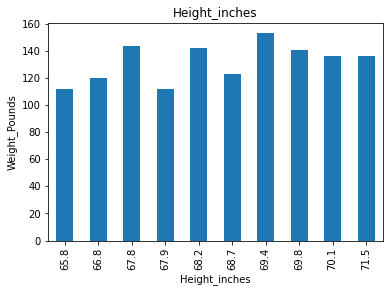

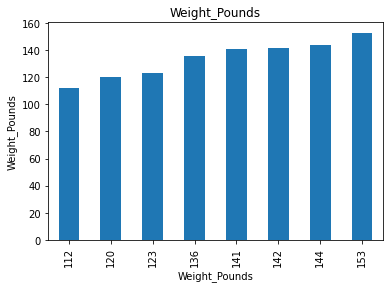

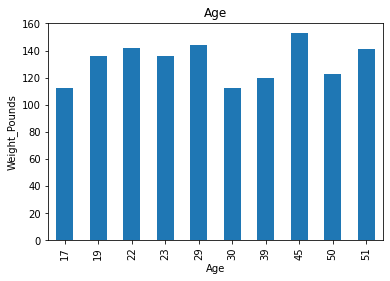

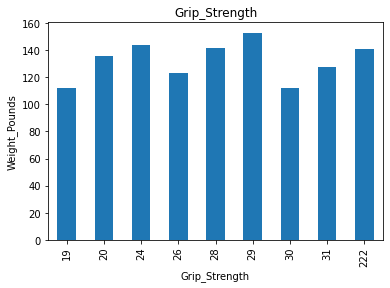

In [32]:
# Here we are finding the relationship between the Usage feature and discrete features

for feature in Discrete_features:
    data = Industry_data.copy()
    data.groupby(feature)['Weight_Pounds'].median().plot.bar()
    plot.xlabel(feature)
    plot.ylabel('Weight_Pounds')
    plot.title(feature)
    plot.show()
    

In [33]:
Continuous_features= [feature for feature in numerical_features if feature not in Discrete_features]
print('Number of continous features: {}'.format(len(Continuous_features)))
Industry_data[Continuous_features].head()

Number of continous features: 0


""
0
1
2
3
4


In [34]:
# These are the continuous variables and we will find the distributions of the continous variables for that we will use Histograms.
# There is a skewed data, so we need to convert skewed data into Gauss distribution or Standard Normal Distribution.
for feature in Continuous_features:
    data = Industry_data.copy()
    data[feature].hist(bins=25)
    plot.xlabel(feature)
    plot.ylabel('Count')
    plot.title(feature)
    plot.show()

In [35]:
Categorical_features= [feature for feature in Industry_data.columns if Industry_data[feature].dtype == 'O']
Categorical_features

['Frailty']

In [36]:
Industry_data[Categorical_features].head()

,Frailty
0,N
1,N
2,N
3,Y
4,Y


In [37]:
for feature in Categorical_features:
    print('the feature is {} and number of categories are {}'.format(feature,len(Industry_data[feature].unique())))

the feature is Frailty and number of categories are 2


In [38]:
Industry_data.describe()

,Height_inches,Weight_Pounds,Age,Grip_Strength
count,10.000000,10.000000,10.000000,10.000000
mean,68.600000,131.900000,32.500000,46.000000
std,1.670662,14.231811,12.860361,61.989246
min,65.800000,112.000000,17.000000,19.000000
25%,67.825000,120.750000,22.250000,24.500000
50%,68.450000,136.000000,29.500000,28.500000
75%,69.700000,141.750000,43.500000,30.750000
max,71.500000,153.000000,51.000000,222.000000


In [39]:
Industry_data.corr()

,Height_inches,Weight_Pounds,Age,Grip_Strength
Height_inches,1.000000,0.571525,-0.032580,0.245261
Weight_Pounds,0.571525,1.000000,0.190926,0.231613
Age,-0.032580,0.190926,1.000000,0.525447
Grip_Strength,0.245261,0.231613,0.525447,1.000000


In [40]:
pip install ydata-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 31.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=41b574fda250fe50194b812efd8dc47232bb4c33b1cdf76dee27829a1b41c4cf
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.7.1
    Unin

In [41]:
from pandas_profiling import ProfileReport

In [42]:
profile_report = ProfileReport(Industry_data)

## This is the complete profile report of the data given.
## Each time when we want to work on this, we need to run this command.

In [43]:
profile_report.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## Spearman's Correlation map


<AxesSubplot:>

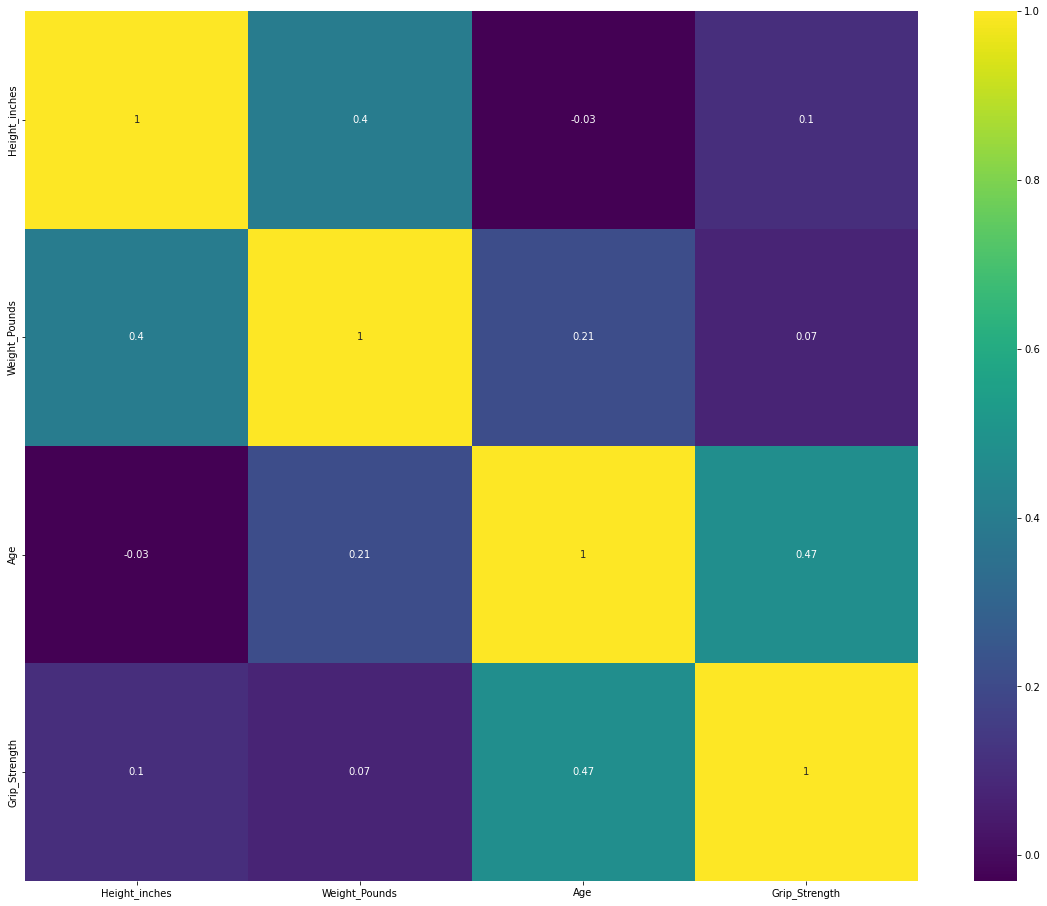

In [44]:
plot.figure(figsize=(20,16))
sns.heatmap(Industry_data.corr(method='spearman'),cmap='viridis',annot=True)

## Indexing is done on the data feature and one hot encoding is applied on categorical data.

In [45]:
#indexing date
Industry_data = Industry_data.set_index('Height_inches')

In [46]:
Frailty = pd.get_dummies(Industry_data['Frailty'], drop_first = True, prefix = 'Dummy')

In [47]:
Industry_data = pd.concat([Industry_data, Frailty], axis = 1)

In [48]:
Industry_data

,Weight_Pounds,Age,Grip_Strength,Frailty,Dummy_Y
Height_inches,,,,,
65.8,112,30,30,N,0
71.5,136,19,31,N,0
69.4,153,45,29,N,0
68.2,142,22,28,Y,1
67.8,144,29,24,Y,1
68.7,123,50,26,N,0
69.8,141,51,222,Y,1
70.1,136,23,20,Y,1
67.9,112,17,19,N,0


In [49]:
Industry_data.columns

Index(['Weight_Pounds', 'Age', 'Grip_Strength', 'Frailty', 'Dummy_Y'], dtype='object')

In [50]:
print(Industry_data.dtypes)
# Data types of all the columns

Weight_Pounds     int64
Age               int64
Grip_Strength     int64
Frailty          object
Dummy_Y           uint8
dtype: object


## Coverting the dataframe into a csv file

In [51]:
Industry_data.to_csv('mahi_assignment_cleaned.csv')